# Credit Card Fraud Detection
### This dataset (and associated information) can be found at: https://www.kaggle.com/dalpozz/creditcardfraud

## This project is divided in 3 sections:
## - 1. Data Cleaning
## - 2. Feature Engineering
## - 3. Predictive Modelling using Machine Learning

### Our goal is to create a model that allows us to detect fraudulent credit card transactions. For this, we have a labeled dataset of transactions made by credit cards in September 2013 by european cardholders. 
### This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Without proper feature enginnering, would greatly impact the accuracy of our models.
### The features we have for prediction (aside from transaction amount, and time) are the result of a PCA transformation, in order to anonymize client data. Thus, there are not many conclusions we can extract with data exploration.
### This is the case of a binary classification problem, a type of supervised learning problem.

## 1. Data Cleaning
### First we import our required libraries, read in our dataset, examine the header and verify if there are any non-numeric or null values in the dataset.

In [77]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

dataset = pd.read_csv("Data/creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## 2. Feature Engineering
### The data does not contain any non-numeric or null values. However, the values in the "Amount" column are not in the same order of magnitude as the other features of the dataset. This can impact the way our models weight this feature, so in the cell below, we normalize the values of this feature to a range within -1 and 1.

In [79]:
from sklearn.preprocessing import StandardScaler

dataset['normAmount'] = StandardScaler().fit_transform(dataset['Amount'].reshape(-1, 1))
dataset = dataset.drop(['Time','Amount'],axis=1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### In order to validate the results of our later tests, we will divide our dataset into a training set (70%)and a testing set (30%). We will train our models in the training set, and test them in our testing set, in order to avoid benchmarking the performance of our models in data it has already "seen".

In [80]:
from sklearn.model_selection import train_test_split
labels = dataset["Class"]
features = dataset.drop("Class", axis=1)

# Perform the train/test split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 0)

train_dataset = train_features
train_dataset["Class"] = train_labels
train_dataset = train_dataset.reset_index()
train_dataset = train_dataset.drop("index", axis=1)

train_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.161761,0
1,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.345313,0
2,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.326845,0
3,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.329401,0
4,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.006398,0


### The great feature engineering challenge of this dataset is the extremely high unbalance of in terms of fradulent transactions to non-fraudulent transactions. 
### One of the way to tackle this imbalance is to underbalance our training set, so that it contains a 50/50 ratio. This is what we will do, by selecting all the fraudulent transactions in the training set, and mixing them with an equal amount of randomly chosen non-fraudulent transactions.

In [81]:
# Number of fraudulent transactions in the training set
number_records_fraud = len(train_dataset[train_dataset["Class"] == 1])

# Indices
fraud_indices = train_dataset[train_dataset["Class"] == 1].index
normal_indices = train_dataset[train_dataset["Class"] == 0].index

# Select random non-fraudulent transactions
np.random.seed(0)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Concat the two sets of transactions
under_sample_data = pd.concat([train_dataset.iloc[fraud_indices], train_dataset.iloc[random_normal_indices]])

train_labels_undersample = under_sample_data["Class"]
train_features_undersample = under_sample_data.drop("Class", axis=1)

# Show ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  690


## 3. Predictive Modelling using Machine Learning

### In the cells below, we create two predictive models: One using Logistic Regression, and another using a Random Forest Classifier.
### For each, we will visualize a Confusion Matrix, and calculate error metrics.
### The most important error metrics for this problem are:
### - Recall (True Positive rate): The portion of fraudulent transactions we "caught". Since the goal of this project is to detect fraudulent transactions, obtaining a high value in this metric is paramount.
### - Precision (Positive predictive value): The portion of predicted frauds that are actually frauds. We want to avoid false positives, but since the consequences of not detecting a true fraud are much higher than mistakenly flagging a transaction as fraudulent, we can accept a resonable amount of false positives.
### - Accuracy: The accuracy of the model as a whole. High accuracy is also important, since it gives us a general idea of how well the model performs.
### - Area under Curve of the resulting Reciever Operating Characteristic (ROC) curve. Higher values of area indicate a better sensitivity/fall-out ratio, so this metric is also important to acess the general performance of our model.

## Logistic Regression:

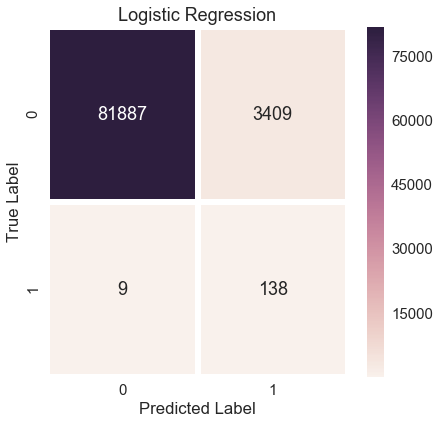

Recall:  0.938775510204
Precision:  0.0389061178461
Accuracy:  0.959996722962


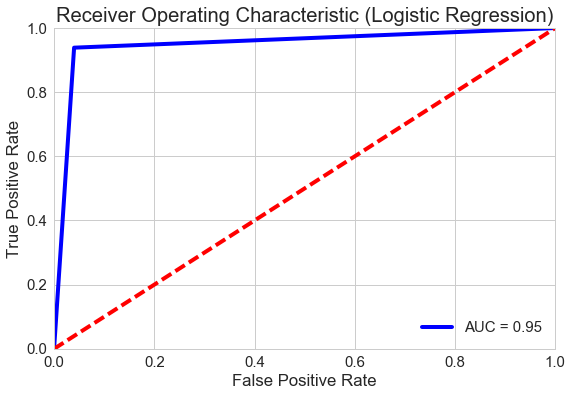

ROC Area under Curve: 0.949404403011


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

lr = LogisticRegression()
lr.fit(train_features_undersample, train_labels_undersample)
predictions = lr.predict(test_features)

fpr, tpr, _ = roc_curve(test_labels, predictions)
roc_auc = roc_auc_score(test_labels, predictions)

cnf_matrix = confusion_matrix(test_labels, predictions)

f, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.5)
ax = sns.heatmap(cnf_matrix, annot=True, fmt="d", linewidths=5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression")
plt.show()

print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("Accuracy: ", (cnf_matrix[1,1]+cnf_matrix[0,0])/len(test_labels))

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC Area under Curve: " + str(roc_auc))

## Random Forest Classifier:

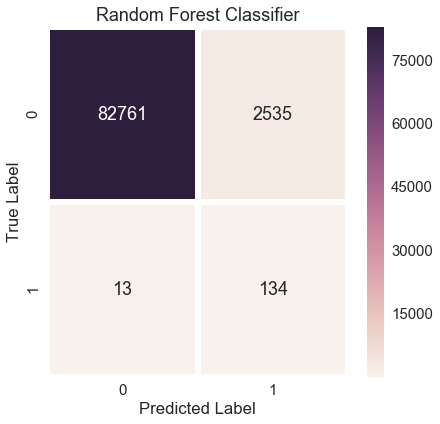

Recall:  0.91156462585
Precision:  0.050206069689
Accuracy:  0.970178949709


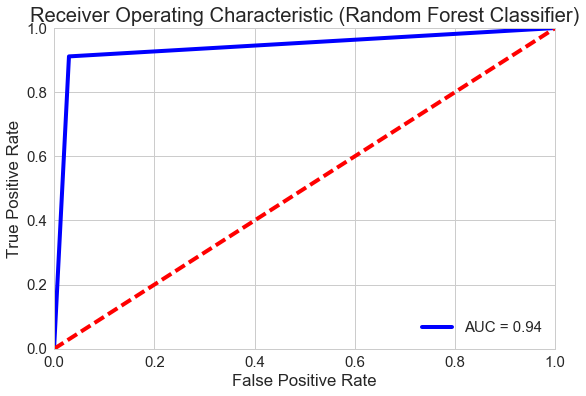

ROC Area under Curve: 0.940922296043


In [83]:
from sklearn.ensemble import RandomForestClassifier

rnd_for = RandomForestClassifier(n_estimators=1000, random_state=0)
rnd_for.fit(train_features_undersample, train_labels_undersample)
predictions = rnd_for.predict(test_features)

fpr, tpr, _ = roc_curve(test_labels, predictions)
roc_auc = roc_auc_score(test_labels, predictions)

cnf_matrix = confusion_matrix(test_labels, predictions)

f, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.5)
ax = sns.heatmap(cnf_matrix, annot=True, fmt="d", linewidths=5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Classifier")
plt.show()

print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision: ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
print("Accuracy: ", (cnf_matrix[1,1]+cnf_matrix[0,0])/len(test_labels))

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

plt.title('Receiver Operating Characteristic (Random Forest Classifier)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC Area under Curve: " + str(roc_auc))

## Model Selection:
### We select the Logistic Regression as our predictive model, since it performs best in most important metrics (Recall and Precision) for this problem.
### With a Recall around 0.94, it sucessfully detects almost all fraudulent transactions. 
### With a Precision around 0.04, it indicates that only 1 in 25 transactions flagged as fraudulent will turn out to be actually fraudulent. 
### However, when you consider that the consequences of not detecting a fraudulent transaction are much more negative than further investigating a false positive, we can consider this model as very valuable in the detection of credit card fraud.